In [694]:
# TODO: Find time complexities and exact time of solution methods

In [695]:
%matplotlib inline
import matplotlib.pyplot as plt
import itertools

import numpy as np
from numpy.random import default_rng
rng = default_rng(257) # seed

# Task 1

In [696]:
# define matrix sizes
N = 500
p = 30

In [697]:
X = rng.random((N, p)) # design matrix
w = rng.random(p) # weights

In [698]:
y = X @ w + (rng.normal(0, 1, N))

In [699]:
# plt.scatter(y, X)

## Closed Form

In [700]:
w_closed = np.linalg.inv(X.T @ X) @ X.T @ y
print(w)

[0.20523592 0.10052368 0.7276903  0.40181495 0.44959387 0.25190249
 0.98290855 0.62721369 0.1829329  0.38044822 0.61913637 0.86091958
 0.05323732 0.44523076 0.86844992 0.24509841 0.05436804 0.7497901
 0.74520965 0.12103714 0.12670975 0.30336211 0.29445931 0.7244757
 0.68036979 0.30087427 0.47812213 0.95868227 0.96878081 0.93608734]


In [701]:
y_closed = X @ w_closed
print('y_closed', y_closed)

y_closed [ 8.10190582  7.45681566  7.02696653  6.863184    7.0985968   6.68871634
  5.3285153   8.66242294  6.96423873  8.08416821  6.35285141  6.07184321
  6.21013935  8.2013515   7.68293005  8.60367474  6.41375582  7.66862252
  7.02927474  6.40074614  6.80014288  6.4675296   7.10619744  7.24651579
  8.63491887  6.84253309  7.03533034  7.4993607   7.8126233   6.70156613
  7.96314321  6.780149    8.91272097  8.07131319  5.26765624  6.68709445
  6.6260461   5.77718037  5.71358262  6.38000595  8.94435518  5.42155172
  8.57303926  7.23116504  7.41727217  6.73908956  7.81768377  9.50753128
  7.7067707   8.74430818  5.60504923  6.81291379  7.7078      8.59541793
  8.01330937  7.65254017  7.06473687  7.02494069  6.67939215  8.18079538
  7.05404365  5.26565896  6.9132659   9.1548789   6.60509308  7.82429398
  7.52743825  7.6822728   7.18590509  7.0682071   4.9737305   7.44014493
  5.39053605  6.68060916  7.99956486  7.76876841  8.43174564  8.6020377
  7.43380566  7.03609532  7.38780045  7.786

In [702]:
# plt.plot(y_closed, X, color='red')
# plt.scatter(y, X)

## Gradient Descent

In [720]:
w_gd = rng.random(p) # initialise gd weights
learning_rate_gd = 0.0001
maxIter_gd = 1000
iterError_gd = np.zeros(maxIter_gd+1)

iterError_gd[0] = (y - X@w_gd).T @ (y - X@w_gd)

for i in range(maxIter_gd):
    error_diff_gd = -2 * X.T @ (y - X@w_gd) # derivative of error
    w_gd -= learning_rate_gd * error_diff_gd # weight update
    iterError_gd[i+1] = (y - X@w_gd).T @ (y - X@w_gd) # error

y_gd = X @ w_gd

In [721]:
# plt.plot(y_gd, X, color='red')
# plt.scatter(y, X)

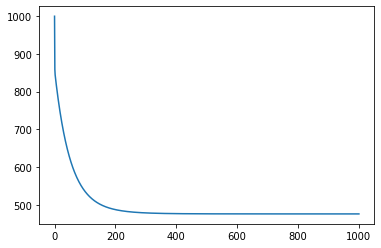

In [722]:
plt.plot(iterError_gd)

## Stochastic Gradient Descent

In [726]:
w_sgd = rng.random(p)
learning_rate_sgd = 0.005
maxIter_sgd = 1000
iterError_sgd = np.zeros(maxIter_sgd+1)

iterError_sgd[0] = (y - X@w_sgd).T @ (y - X@w_sgd)

for i in range(maxIter_sgd):
    j = rng.integers(low=0, high=y.shape[0])
    x_iter = X[j] # random sample of X
    y_iter = y[j] # random sample of Y

    error_diff_sgd = -(y_iter - w_sgd.T@x_iter) * x_iter # derivative of error
    w_sgd -= learning_rate_sgd * error_diff_sgd # sgd update
    iterError_sgd[i+1] = (y - X@w_sgd).T @ (y - X@w_sgd) # error
    
y_sgd = X @ w_sgd

In [727]:
# plt.plot(y_sgd, X, color='red')
# plt.scatter(y, X)

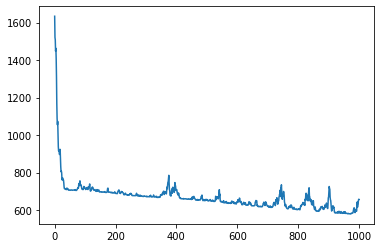

In [728]:
plt.plot(iterError_sgd)

# Task 2
Recursive Least Squares

In [718]:
w_rls = np.zeros((p, 1))
lambda_rls = 0.99
P = np.identity(p)
iterError_rls = np.zeros(y.shape[0]+1)

iterError_rls[0] = (y_n - x_n.T @ w_rls)**2

for i, (x_n, y_n) in enumerate(zip(X, y)):
    x_n = x_n.reshape(-1, 1)

    error = y_n - x_n.T @ w_rls
    k_n = P @ x_n / (lambda_rls + x_n.T @ P @ x_n)
    P = (P - k_n @ x_n.T @ P) / lambda_rls
    w_rls += k_n * error
    iterError_rls[i+1] = (y_n - x_n.T @ w_rls)**2
    
y_rls = X @ w_rls

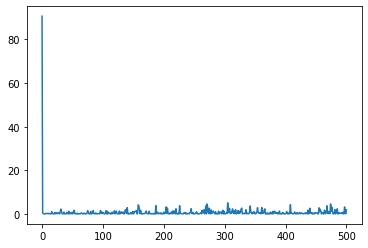

In [719]:
plt.plot(iterError_rls)

# Task 3

In [741]:
!wget --recursive --no-parent -nd https://archive.ics.uci.edu/ml/machine-learning-databases/cpu-performance/ -P ./data/

--2021-02-17 16:28:46--  https://archive.ics.uci.edu/ml/machine-learning-databases/cpu-performance/
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 627 [text/html]
Saving to: ‘./data/index.html’

index.html          100%[===================>]     627  --.-KB/s    in 0s      

2021-02-17 16:28:47 (6.36 MB/s) - ‘./data/index.html’ saved [627/627]

Loading robots.txt; please ignore errors.
--2021-02-17 16:28:47--  https://archive.ics.uci.edu/robots.txt
Reusing existing connection to archive.ics.uci.edu:443.
HTTP request sent, awaiting response... 404 Not Found
2021-02-17 16:28:47 ERROR 404: Not Found.

--2021-02-17 16:28:47--  https://archive.ics.uci.edu/ml/machine-learning-databases/cpu-performance/Index
Reusing existing connection to archive.ics.uci.edu:443.
HTTP request sent, awaiting response... 200 OK
Length: 122 [appli